In [1]:
!git clone https://github.com/dtylor/WalkRNN.git
%cd WalkRNN
!ls

Cloning into 'WalkRNN'...
remote: Enumerating objects: 326, done.
remote: Total 326 (delta 0), reused 0 (delta 0), pack-reused 326
Receiving objects: 100% (326/326), 1.05 MiB | 967.00 KiB/s, done.
Resolving deltas: 100% (180/180), done.
/content/WalkRNN
AIDS			 graphwave		Motivation.ipynb  test.py
Cuneiform		 __init__.py		MUTAG.ipynb	  TODO
data			 LICENSE-3RD-PARTY.txt	n2v		  utilities.py
Demonstration.ipynb	 LICENSE.md		OrgChart.ipynb
GraphLM_walk_AIDS.ipynb  module.py		README.md


In [2]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0    227      0  0:00:01  0:00:01 --:--:--   227
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
import fastai
import pandas as pd

In [4]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.1.0
nvidia driver : 418.67
torch cuda    : 10.0.130 / is available
torch cudnn   : 7501 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run t

In [5]:
str(fastai.__dict__['version'])
!more /usr/local/lib/python3.6/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.57'


In [6]:
!ls

AIDS			 graphwave		Motivation.ipynb  test.py
Cuneiform		 __init__.py		MUTAG.ipynb	  TODO
data			 LICENSE-3RD-PARTY.txt	n2v		  utilities.py
Demonstration.ipynb	 LICENSE.md		OrgChart.ipynb
GraphLM_walk_AIDS.ipynb  module.py		README.md


In [0]:
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels

node_mappings = [{
        0:       "C",
        1:       "O",
        2:       "N",
        3:       "Cl",
        4:       "F",
        5:       "S",
        6:       "Se",
        7:       "P",
        8:       "Na",
        9:       "I",
        10:      "Co",
        11:      "Br",
        12:      "Li",
        13:      "Si",
        14:      "Mg",
        15:      "Cu",
        16:      "As",
        17:      "B",
        18:      "Pt",
        19:      "Ru",
        20:      "K",
        21:      "Pd",
        22:      "Au",
        23:      "Te",
        24:      "W",
        25:      "Rh",
        26:      "Zn",
        27:      "Bi",
        28:      "Pb",
        29:      "Ge",
        30:      "Sb",
        31:      "Sn",
        32:      "Ga",
        33:      "Hg",
        34:      "Ho",
        35:      "Tl",
        36:      "Ni",
        37:      "Tb"
}]

label_maps={"node_labels": node_mappings}

G = load_graph_kernel_graph("./AIDS", mappings=label_maps)
y = load_graph_kernel_labels("./AIDS")

Omitting graph 63 with node count: 2 < 4
Omitting graph 352 with node count: 2 < 4
Omitting graph 464 with node count: 3 < 4
Omitting graph 784 with node count: 3 < 4
Omitting graph 1798 with node count: 3 < 4


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


DONE


In [0]:
from module import get_structural_signatures, walk_as_string

In [12]:
newGraph, pca, kmeans = get_structural_signatures(G)

Omitting graph 25 with node count: 4 < 6
Omitting graph 63 with node count: 2 < 6
Omitting graph 318 with node count: 4 < 6
Omitting graph 352 with node count: 2 < 6
Omitting graph 464 with node count: 3 < 6
Omitting graph 502 with node count: 5 < 6
Omitting graph 523 with node count: 4 < 6
Omitting graph 565 with node count: 5 < 6
Omitting graph 593 with node count: 4 < 6
Omitting graph 784 with node count: 3 < 6
Omitting graph 839 with node count: 4 < 6
Omitting graph 1099 with node count: 4 < 6
Omitting graph 1122 with node count: 4 < 6
Omitting graph 1285 with node count: 5 < 6
Omitting graph 1321 with node count: 4 < 6
Omitting graph 1329 with node count: 5 < 6
Omitting graph 1483 with node count: 5 < 6
Omitting graph 1490 with node count: 4 < 6
Omitting graph 1668 with node count: 4 < 6
Omitting graph 1711 with node count: 4 < 6
Omitting graph 1742 with node count: 4 < 6
Omitting graph 1795 with node count: 4 < 6
Omitting graph 1798 with node count: 3 < 6
Omitting graph 1967 with

In [13]:
walks = walk_as_string(newGraph, componentLabels = y)

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/content/WalkRNN/module.py:131: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[ 1  6  1  6  5 10  5  6  5 10  5 10  5 10  9 46  9 46 47 46 47 46 47 46  9 46 47 46  9 10]
[ 1  2  1  6  5 10  9 46 47 46 47 46 47 46  9 46 47 46 47 46  9  8 11  8  7  8  9 10  5  4]
[ 1  2 12 13 14 13 12 13 27 13 14 15 14 15 25 24 25 15 14 13 28 13 27 13 28 13 12 13 14 13]


In [0]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy

In [15]:
walks.head()

,walk,label,start_node,component
0,1 4 10 15 50 60 63 1 4 10 15 53 59 63 1 4 10 1...,0,1,1
1,1 4 10 15 50 60 62 1 4 10 15 50 59 62 1 4 10 1...,0,1,1
2,1 4 10 15 50 60 62 1 4 10 15 50 59 62 1 9 10 1...,0,1,1
3,1 4 10 15 50 60 62 1 4 10 15 50 59 63 1 4 10 1...,0,1,1
4,1 4 10 15 50 60 62 1 4 10 15 50 59 62 1 9 10 1...,0,1,1


In [16]:
walks.shape

(623500, 4)

In [0]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [18]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(455460, 4)

In [19]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(58660, 4)

In [20]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(109380, 4)

In [0]:
!mkdir result
mypath = './result'

In [0]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [0]:
data_lm.save('data_lm.pkl')

In [24]:
!ls -l ./result

total 1287300
-rw-r--r-- 1 root root 1318187555 Sep 24 16:23 data_lm.pkl


In [0]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm.pkl', bs=bs)


In [26]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,62 1 4 10 15 53 59 62 1 4 10 15 53 59 62 1 4 10 15 53 59 62 1 4 10 15 53 59 63 1 4 10 15 53 56 62 1 9 10 16 53 56 62 1 4 10 15 53 56 62 1 9 10 16 53 56 62 1 4 10 15 53 56 62 1 9 10 16 53 56
1,9 10 16 51 59 63 3 5 10 20 51 56 63 2 9 10 16 51 59 63 3 5 10 20 51 56 62 2 9 10 16 51 56 62 3 5 10 20 51 56 62 3 4 10 15 51 56 62 3 5 10 20 51 56 63 2 9 10 16 51 59 63 3 5 10 20 51 56 62 3
2,4 10 15 51 56 xxbos 2 9 10 16 51 57 63 3 4 10 15 51 57 62 4 4 10 15 51 56 62 3 4 10 15 51 56 62 4 4 10 15 51 56 62 3 4 10 15 51 56 62 3 4 10 15 51 56 62 4 4 10 15 51 59 62 2 4 10 15 51 59 62 2
3,3 4 10 15 51 57 62 3 4 10 15 51 56 xxbos 3 4 10 15 54 56 62 4 5 10 17 54 56 62 3 4 10 15 51 57 62 4 5 10 17 54 56 62 3 4 10 15 54 56 62 3 4 10 15 51 56 62 2 5 10 17 51 59 62 3 4 10 15 51 56 62
4,3 5 10 17 51 59 62 2 4 10 15 51 59 62 2 5 10 17 51 56 xxbos 3 4 10 15 54 56 62 4 5 10 17 54 56 62 3 4 10 15 54 56 63 2 4 10 15 51 56 62 2 4 10 15 51 56 62 2 4 10 15 51 56 62 3 5 10 17 51 57 62


In [0]:
#awd_lstm_lm_config = dict(emb_sz=400, n_hid=400, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.25,
      #                    hidden_p=0.1, input_p=0.2, embed_p=0.02, weight_p=0.15, tie_weights=True, out_bias=True)

#awd_lstm_clas_config = dict(emb_sz=400, n_hid=400, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,
       #                hidden_p=0.2, input_p=0.6, embed_p=0.1, weight_p=0.5, tie_weights=True, out_bias=True)


#awd_lstm_lm_config = dict(emb_sz=400, n_hid=400, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.25,hidden_p=0.1, input_p=0.2, embed_p=0.02, weight_p=0.15, tie_weights=True, out_bias=True)

#awd_lstm_clas_config = dict(emb_sz=400, n_hid=400, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4, hidden_p=0.2, input_p=0.6, embed_p=0.1, weight_p=0.5)
#awd_lstm_lm_config = dict(emb_sz=400, n_hid=1150, n_layers=3, pad_token=1, qrnn=False, bidir=False, output_p=0.25,
 #                         hidden_p=0.1, input_p=0.2, embed_p=0.02, weight_p=0.15, tie_weights=True, out_bias=True)

#awd_lstm_clas_config = dict(emb_sz=400, n_hid=1150, n_layers=3, pad_token=1, qrnn=False, bidir=False, output_p=0.4,
  #                     hidden_p=0.2, input_p=0.6, embed_p=0.1, weight_p=0.5)

#dAWD_LSTM = {'hid_name':'emb_sz', 'url':URLs.WT103_FWD, 'url_bwd':URLs.WT103_BWD,'config_lm':awd_lstm_lm_config, 'split_lm': awd_lstm_lm_split, 'config_clas':awd_lstm_clas_config, 'split_clas': awd_lstm_clas_split}

#awd_lstm_lm_config = dict(emb_sz=400, n_hid=1152, n_layers=3, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)

awd_lstm_lm_config = dict(emb_sz=400, n_hid=400, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=400, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

In [0]:
#torch.cuda.set_device(1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.357347,0.335611,0.862365,24:40


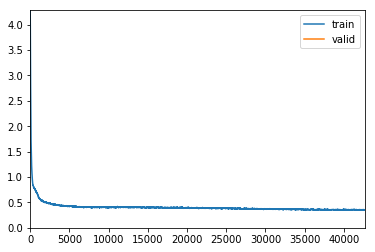

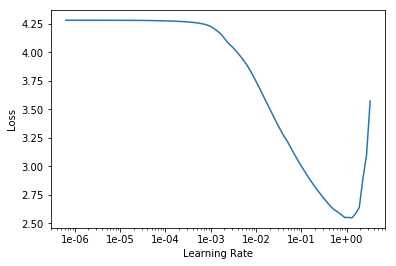

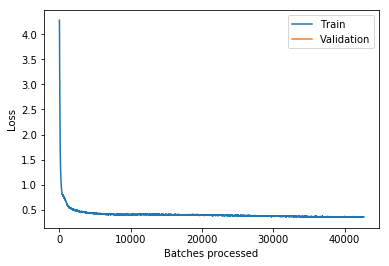

In [29]:

learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.8, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')

In [0]:
# !mkdir /content/drive/My\ Drive/AIDS
# !cp -r /content/result /content/drive/My\ Drive/AIDS

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


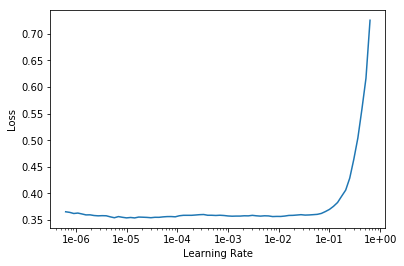

In [31]:
#learn.load('fit-head')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.752940,0.712599,0.716550,25:22
1,0.598745,0.558148,0.779149,24:44


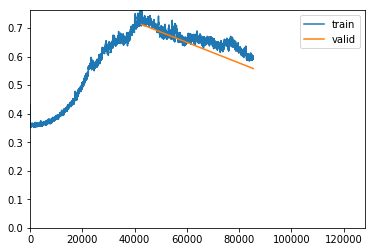

Buffered data was truncated after reaching the output size limit.

In [32]:
learn.fit_one_cycle(3, .05, moms=(0.8,0.7))

In [0]:
learn.save('fit-head')

In [34]:
!cp -r /content/result /content/drive/My\ Drive/AIDS

cp: cannot stat '/content/result': No such file or directory


In [0]:
learn.save_encoder('fine_tuned_enc3')

In [36]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index
#g = df.groupby('node')
g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')
#df[(df['RN']==1.0) & (df['component']=='1')].head()
df[df['component']==1].head()
#df.head()

,walk,label,start_node,component,index1,RN
766,1 9 10 16 53 56 62 1 4 10 15 53 56 62 1 4 10 1...,0,46,1,766,1.0
1359,1 4 10 15 54 56 62 1 4 10 15 54 59 62 1 4 10 1...,0,30,1,1359,2.0
2133,1 4 10 15 50 59 63 1 4 10 15 50 59 63 1 4 10 1...,0,2,1,2133,3.0
2538,1 4 10 15 53 56 62 1 4 10 15 53 56 62 1 9 10 1...,0,9,1,2538,4.0
2660,1 9 10 16 54 56 63 1 4 10 15 50 56 62 1 4 10 1...,0,26,1,2660,5.0


Choose a path per node and concatenate for entire component

In [37]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=6.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
1,0,1 9 10 16 53 56 62 1 4 10 15 53 56 62 1 4 10 1...
2,1,3 5 10 17 54 56 62 3 4 10 15 54 56 63 2 9 10 1...
3,1,4 4 10 15 54 56 62 2 5 10 17 54 56 63 2 4 10 1...
4,1,4 4 10 15 54 56 62 4 5 11 17 51 56 62 2 9 12 1...
5,0,3 4 10 15 51 57 62 3 4 10 15 51 56 62 3 9 10 1...


In [38]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

,label,text,component
comp,,,
1,0,1 9 10 16 53 56 62 1 4 10 15 53 56 62 1 4 10 1...,1
2,1,3 5 10 17 54 56 62 3 4 10 15 54 56 63 2 9 10 1...,2
3,1,4 4 10 15 54 56 62 2 5 10 17 54 56 63 2 4 10 1...,3
4,1,4 4 10 15 54 56 62 4 5 11 17 51 56 62 2 9 12 1...,4
5,0,3 4 10 15 51 57 62 3 4 10 15 51 56 62 3 9 10 1...,5


In [39]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((1440, 3), (360, 3), (200, 3), 0.72)

In [0]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [0]:
data_clas.save('tmp_clas')

In [0]:
data_clas = load_data(mypath, 'tmp_clas', bs=bs)


In [43]:
data_clas.show_batch()

text,target
xxbos 1 4 10 15 50 57 62 1 4 10 15 50 56 62 1 4 10 15 50 57 63 1 4 10 15 50 56 63 1 4 10 15 50 57 62 1 4 10 15 50 56 63 1 4 10 15 50 56 62 1 4 10 15 50 56 63 1 4 10 15 50 56 63 1 4 10 15 50 56,0
xxbos 1 4 10 15 51 57 63 1 4 10 15 51 61 62 1 4 10 15 51 61 62 1 4 10 15 51 61 63 1 4 10 15 51 57 62 1 4 10 15 51 57 62 1 4 10 15 51 57 62 1 4 10 15 51 57 63 1 4 10 15 51 61 62 1 4 10 15 51 61,0
xxbos 3 4 10 15 51 56 63 3 5 10 17 51 56 62 4 5 10 17 51 56 63 3 4 10 15 51 59 62 3 5 10 17 51 56 63 4 5 10 17 51 56 63 3 5 10 17 51 56 62 3 4 10 15 51 59 62 2 5 10 20 51 59 62 3 4 10 15 51 59,1
xxbos 2 7 10 19 51 56 62 3 4 10 15 51 56 62 2 7 10 19 51 59 62 3 4 10 15 51 56 62 2 7 10 19 51 59 62 3 4 10 15 51 56 62 2 7 10 19 51 56 62 3 4 10 15 51 56 62 2 7 10 19 51 56 62 3 4 10 15 51 56,1
xxbos 4 8 13 24 54 56 62 2 5 10 17 51 56 62 4 8 13 24 54 56 62 2 5 10 17 54 59 62 4 8 13 24 54 56 62 2 5 10 17 54 59 62 4 8 13 24 54 56 62 2 5 10 17 51 56 62 4 8 13 24 54 56 62 2 5 10 17 51 56,1


In [0]:
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=1.7,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [0]:
gc.collect();

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


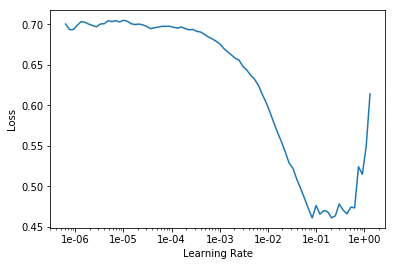

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.185181,0.092910,0.994444,00:13


In [0]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [50]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.124097,0.043669,0.994444,00:13


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [53]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.086874,0.034159,0.994444,00:28


In [54]:
predict(test,learn)

(200, 199, 0.995)


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [57]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.109549,0.037609,0.994444,00:28


In [58]:
predict(test,learn)

(200, 199, 0.995)


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [61]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.089613,0.037266,0.994444,00:28
1,0.087959,0.034217,0.994444,00:28
2,0.075896,0.034579,0.994444,00:28
3,0.079713,0.034177,0.994444,00:28


In [62]:
predict(test,learn)

(200, 199, 0.995)


In [63]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(72, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(72, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.68)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in_features=50, out_features=2, bias=True)
    )
  )
)